In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
from imblearn.over_sampling import RandomOverSampler
import pickle
import time

In [3]:
df = pd.read_csv('./datasets/thyroid.csv')

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
df.shape

(383, 17)

In [7]:
df['Age'].unique

<bound method Series.unique of 0      27
1      34
2      30
3      62
4      62
       ..
378    72
379    81
380    72
381    61
382    67
Name: Age, Length: 383, dtype: int64>

In [8]:
labels = df.columns.tolist()
for x in ['Age','Stage']:
    labels.remove(x)

In [9]:
labels

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Response',
 'Recurred']

In [10]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [11]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,18,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,14,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,46,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [12]:
df['Age'].unique

<bound method Series.unique of 0      11
1      18
2      14
3      46
4      46
       ..
378    56
379    63
380    56
381    45
382    51
Name: Age, Length: 383, dtype: int64>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int32
 2   Smoking               383 non-null    int32
 3   Hx Smoking            383 non-null    int32
 4   Hx Radiothreapy       383 non-null    int32
 5   Thyroid Function      383 non-null    int32
 6   Physical Examination  383 non-null    int32
 7   Adenopathy            383 non-null    int32
 8   Pathology             383 non-null    int32
 9   Focality              383 non-null    int32
 10  Risk                  383 non-null    int32
 11  T                     383 non-null    int32
 12  N                     383 non-null    int32
 13  M                     383 non-null    int32
 14  Stage                 383 non-null    int32
 15  Response              383 non-null    int32
 16  Recurred

<AxesSubplot:>

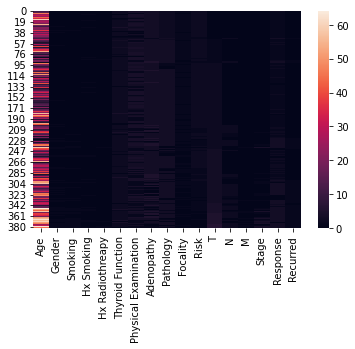

In [14]:
import seaborn as sns
sns.heatmap(df)

In [17]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [19]:
cols_a = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination']
cols_b = ['Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

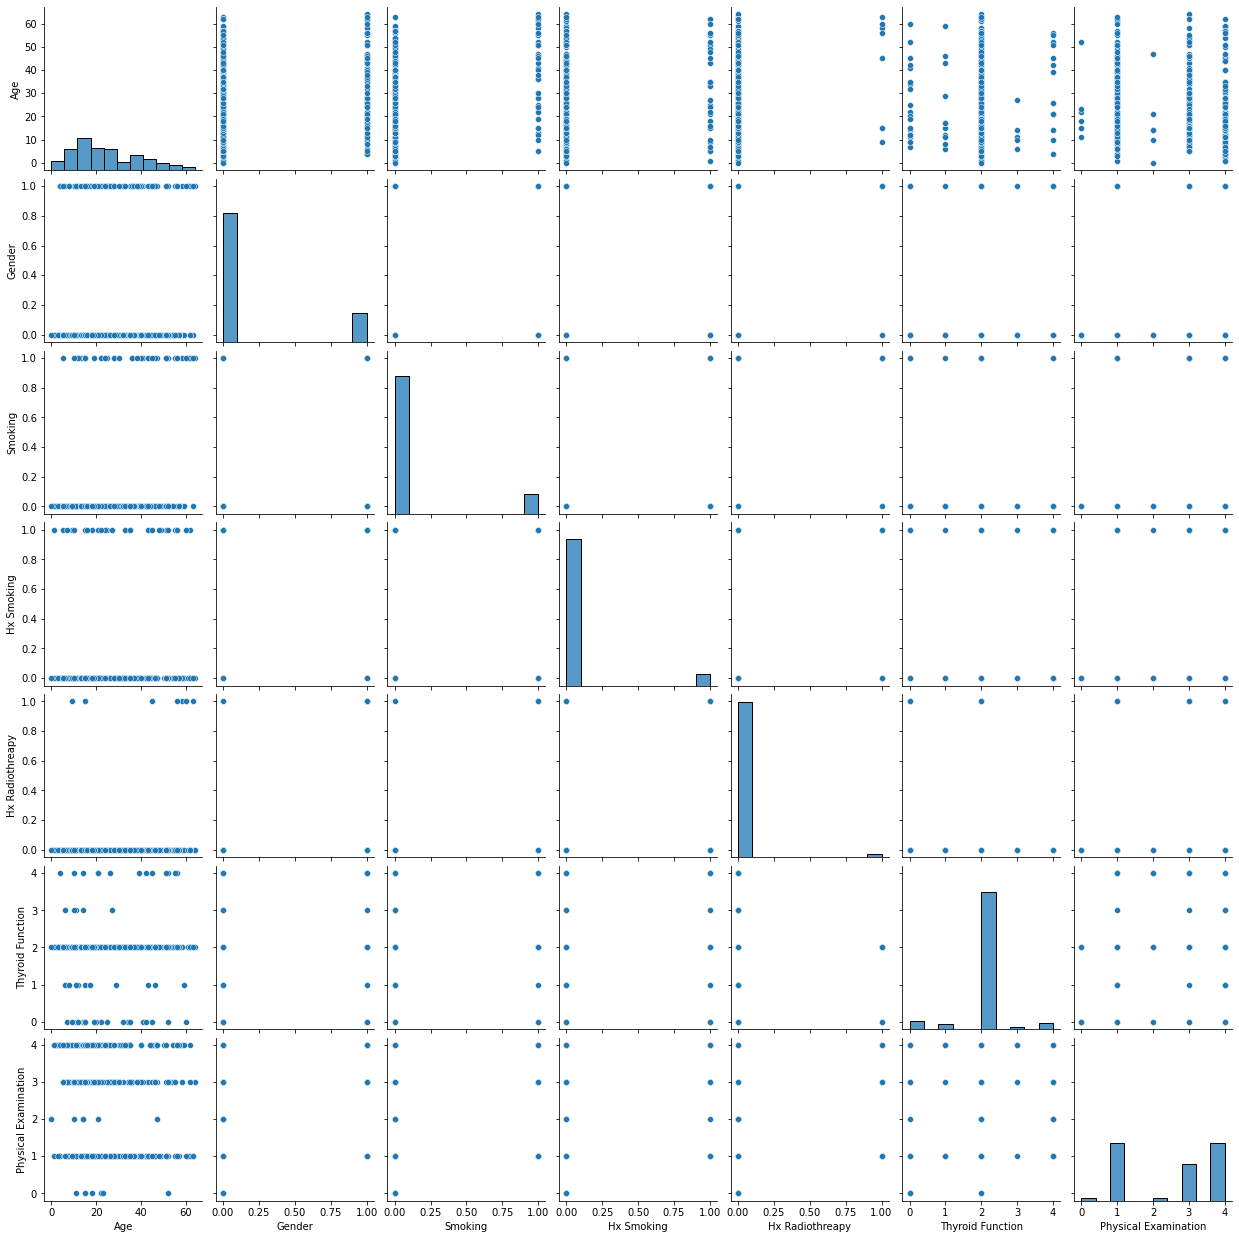

In [20]:
sns.pairplot(df[cols_a])

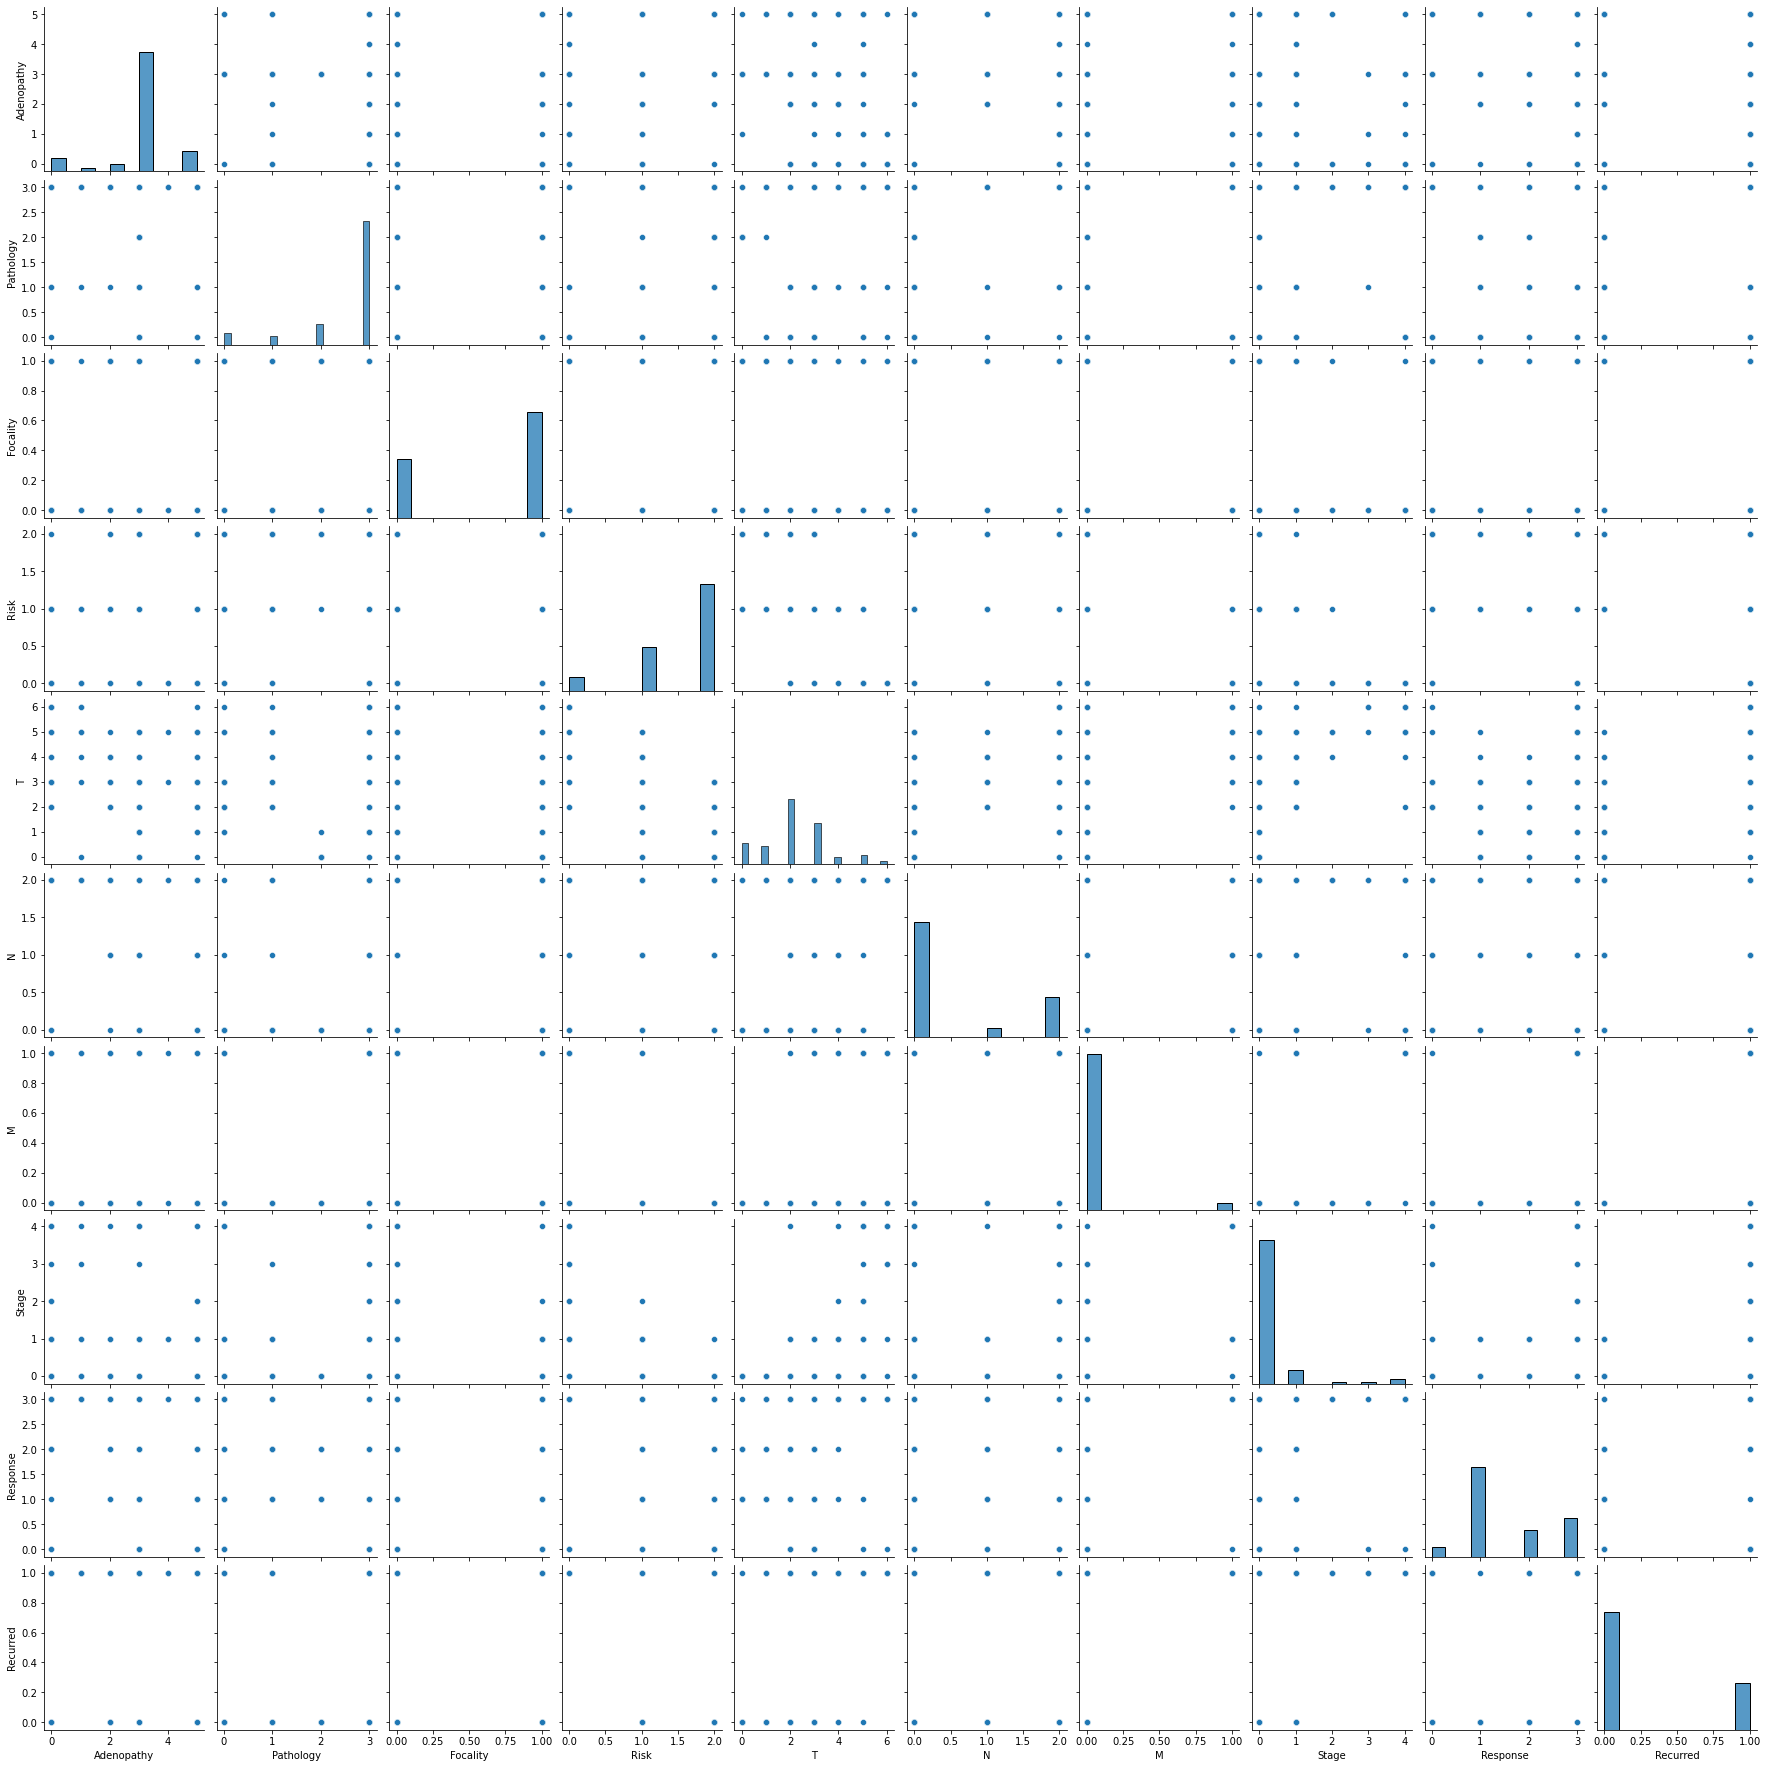

In [21]:
sns.pairplot(df[cols_b])

In [22]:
X = df.drop(columns=['Recurred'])
y = df['Recurred']

In [23]:
y = np.reshape(y.values,(y.shape[0],1))

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
new_data = np.hstack((X, np.reshape(y[:], (-1, 1))))
transformed_df = pd.DataFrame(df, columns = df.columns)

In [25]:
X.shape

(383, 16)

In [26]:
y.shape

(383, 1)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=100)

In [31]:


dense_layers = [1]
layer_sizes = [16]


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        model.add(Activation('relu'))
        model.add(Flatten())

        for _ in range(dense_layer):
            model.add(Dense(layer_size))
            model.add(Activation('relu'))

        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        NAME = "{}-nodes-{}-dense-{}".format( layer_size, dense_layer, int(time.time()))
        tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],
                          )
        model.fit(X_train, y_train,batch_size=5,epochs=20,validation_split = 0.3,callbacks=[tensorboard])
        
        y_pred_prob = model.predict(X_val)
        y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/20
48/48 [==============================] - 1s 14ms/step - loss: 0.6801 - accuracy: 0.5583 - val_loss: 0.6198 - val_accuracy: 0.7404
Epoch 2/20
48/48 [==============================] - 0s 7ms/step - loss: 0.5643 - accuracy: 0.7708 - val_loss: 0.5277 - val_accuracy: 0.8173
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 0.4788 - accuracy: 0.8583 - val_loss: 0.4469 - val_accuracy: 0.8558
Epoch 4/20
48/48 [==============================] - 0s 7ms/step - loss: 0.4078 - accuracy: 0.8875 - val_loss: 0.3807 - val_accuracy: 0.8942
Epoch 5/20
48/48 [==============================] - 0s 7ms/step - loss: 0.3516 - accuracy: 0.9208 - val_loss: 0.3354 - val_accuracy: 0.8942
Epoch 6/20
48/48 [==============================] - 0s 7ms/step - loss: 0.3108 - accuracy: 0.9125 - val_loss: 0.2989 - val_accuracy: 0.8750
Epoch 7/20
48/48 [==============================] - 0s 7ms/step - loss: 0.2792 - accuracy: 0.9125 - val_loss: 0.2725 - val_accuracy: 0.8942
Epoch 8/20
48/48 [=

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 activation_3 (Activation)   (None, 16)                0         
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_4 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.1

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [34]:
cm

array([[31,  0],
       [ 2,  6]], dtype=int64)

In [35]:
pickle.dump(model, open("./models/thyroid.pkl",'wb'))